# Boosting Techniques

# Assignment Questions

# Theoretical

1. What is Boosting in Machine Learning?
   - Boosting is a method used in machine learning to reduce errors in predictive data analysis. Data scientists train machine learning software, called machine learning models, on labeled data to make guesses about unlabeled data.

2. How does Boosting differ from Bagging?
   - Bagging is the simplest way of combining predictions that belong to the same type while Boosting is a way of combining predictions that belong to the different types. Bagging aims to decrease variance, not bias while Boosting aims to decrease bias, not variance.

3. What is the key idea behind AdaBoost?
   - The basic idea behind AdaBoost is to adjust the weights of learners and training the data sample in every iteration in a way that it guarantees the precise predictions of unusual observations. Any ML approach can be employed as a base classifier if it takes the weights on the training set.

4. Explain the working of AdaBoost with an example.
   - AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple "weak" classifiers (like decision stumps) to create a strong classifier by iteratively focusing on misclassified instances and assigning weights to them, ultimately improving predictive accuracy.
        - Here's a breakdown with an example:
              - 1. Initialization:
Assign equal weights to each training example.
Start with a simple base learner (e.g., a decision stump).
              - 2. Iterative Training:
Train a weak learner: Train a base learner (decision stump) on the weighted training data.
Calculate error: Determine the error rate of the weak learner on the weighted training data.
Assign weights to the weak learner: Assign a weight (alpha) to the weak learner based on its error rate (lower error = higher weight).
Update sample weights: Increase the weights of misclassified instances and decrease the weights of correctly classified instances, preparing the data for the next iteration.
Repeat: Continue training new weak learners, updating weights, and calculating errors until a stopping criterion is met (e.g., a maximum number of iterations or a satisfactory error rate).


5. What is Gradient Boosting, and how is it different from AdaBoost?
   - Gradient Boosting and AdaBoost are both ensemble learning methods that combine multiple weak learners to create a strong predictive model, but they differ in how they weight training samples and combine predictions. Gradient boosting focuses on minimizing the loss function's gradient, while AdaBoost focuses on misclassified samples.

6. What is the loss function in Gradient Boosting?
   - In Gradient Boosting, the loss function quantifies the difference between predicted and actual values, guiding the algorithm to minimize errors iteratively by adding weak learners and updating model parameters using the gradient of the loss function.

7. How does XGBoost improve over traditional Gradient Boosting?
   - Parallel processing: XGBoost leverages the power of parallel processing, making it significantly faster than methods such as GBM. It utilizes multiple CPU cores during model execution. The parallelized aspects of XGBoost include tree building and boosting rounds.

8. What is the difference between XGBoost and CatBoost?
   - XGBoost and CatBoost are both gradient boosting algorithms, but CatBoost excels at handling categorical features natively, while XGBoost requires pre-processing of categorical data. CatBoost also builds symmetric trees, which can lead to faster computation and evaluation, and better control of overfitting.

9. What are some real-world applications of Boosting techniques?
   - Boosting techniques, a powerful ensemble learning method, find applications across various fields, including healthcare (disease diagnosis, treatment), finance (fraud detection, credit risk), and IT (search ranking, image recognition) by improving accuracy and handling complex datasets.

10. How does regularization help in XGBoost?
    - Regularization in XGBoost helps mitigate this by: Reducing Model Complexity: By penalizing larger coefficients, regularization simplifies the model. Improving Generalization: Ensures the model performs well on new data. Preventing Overfitting: Keeps the model from becoming too tailored to the training data.

11. What are some hyperparameters to tune in Gradient Boosting models?
    - For gradient-boosting, hyperparameters are coupled, so we cannot set them one after the other anymore. The important hyperparameters are max_iter , learning_rate , and max_depth or max_leaf_nodes (as previously discussed random forest).

12. What is the concept of Feature Importance in Boosting?
    - In the context of boosting algorithms, feature importance refers to a method that assigns a score to each input feature indicating its usefulness in predicting a target variable, allowing for ranking and understanding of feature influence.

13. Why is CatBoost efficient for categorical data?
    - While most gradient-boosting algorithms require these features to be converted into numerical representations through methods like one-hot encoding, CatBoost natively handles categorical data. It automatically determines the best way to represent these features, significantly reducing the need for manual preprocessing.

# Practical

# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [6]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset (replace with your own data)
X = np.array([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6],
    [6, 7], [7, 8], [8, 9], [9, 10], [10, 11],
    [1, 10], [2, 9], [3, 8], [4, 7], [5, 6],
    [6, 5], [7, 4], [8, 3], [9, 2], [10, 1]
])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
# 'estimator' is used instead of 'base_estimator' in newer versions of scikit-learn
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.25


# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [4]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample dataset (replace with your own data)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])  # Linear relationship with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost regressor
# estimator is used instead of base_estimator
# n_estimators is the number of weak learners
# learning_rate shrinks the contribution of each regressor
# random_state ensures reproducibility
regr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=0.1, random_state=42)

# Train the regressor
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print(f"Mean Absolute Error (MAE): {mae}")

# Example to show predicted vs actual values
print("Predicted vs. Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]}")

Mean Absolute Error (MAE): 2.0
Predicted vs. Actual:
Predicted: 17.00, Actual: 19
Predicted: 3.00, Actual: 5


# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

Feature Importances:
mean radius: 1.292348076813499e-05
mean texture: 0.027804583634348873
mean perimeter: 0.00020118364232095282
mean area: 0.0004254033042015456
mean smoothness: 0.0024666044618570173
mean compactness: 0.0029960469868226245
mean concavity: 0.0009222332874449441
mean concave points: 0.4505275876506107
mean symmetry: 0.0005199404606719796
mean fractal dimension: 0.00010669160100635732
radius error: 0.006870207891017868
texture error: 0.003604013810768886
perimeter error: 0.001156802373414802
area error: 0.008415272506866505
smoothness error: 0.0005564528920603285
compactness error: 0.0025106349835955057
concavity error: 0.013067922820320132
concave points error: 0.0020381084784025583
symmetry error: 0.0007028625799243465
fractal dimension error: 0.004223933303430293
worst radius: 0.075588875185215
worst texture: 0.03988648003422685
worst perimeter: 0.05140821113749899
worst area: 0.0382446945612126
worst smoothness: 0.004810830759634738
worst compactness: 0.000450121584

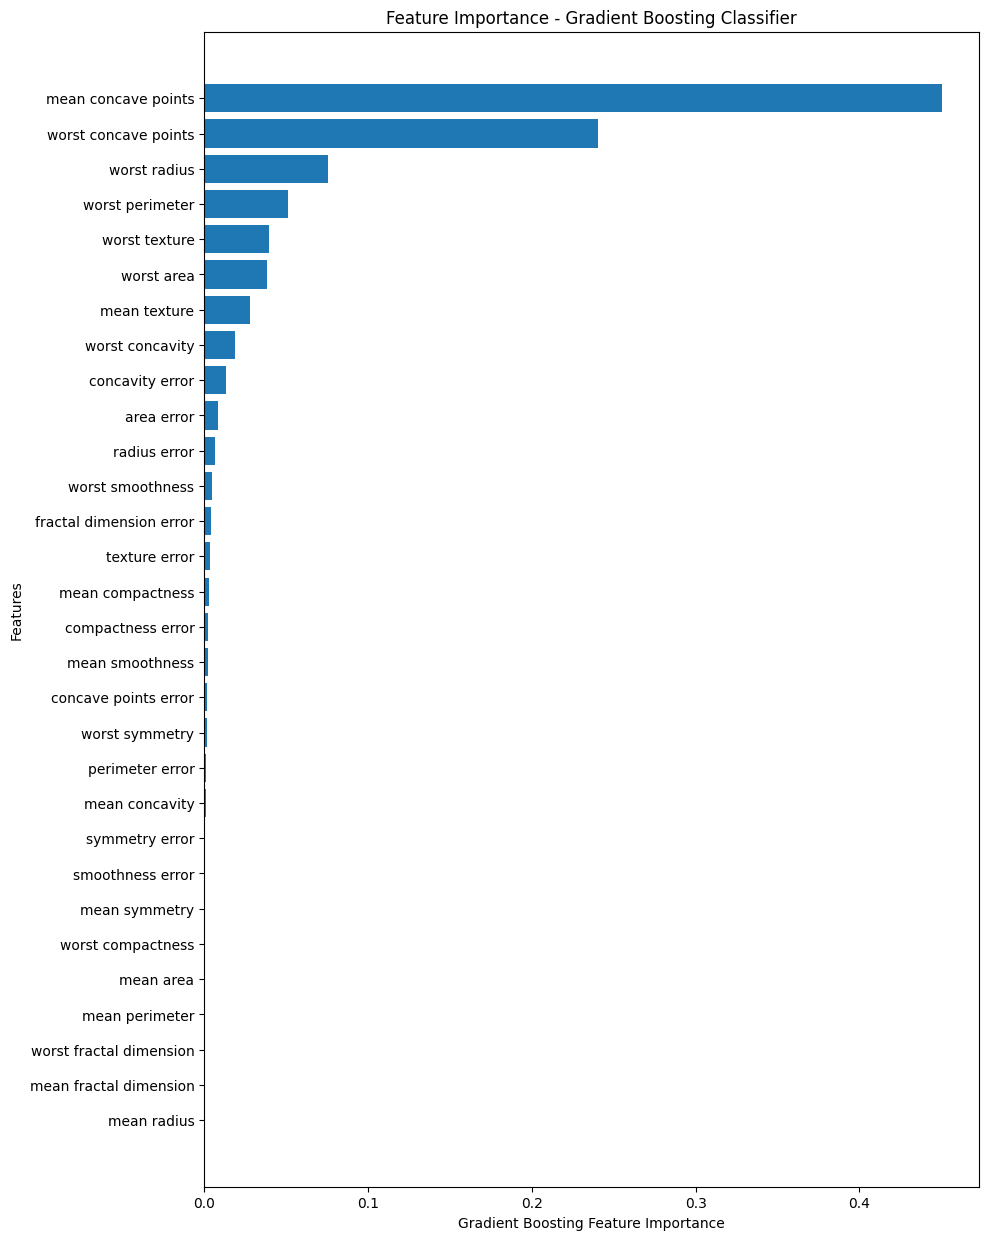

In [7]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Get feature importances
feature_importance = gb_clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

# Visualize feature importances
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, len(feature_names) / 2)) #adjust the size of the graph to fit the amount of features.
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.show()

# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [8]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample dataset (replace with your own data)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 5, 7, 9, 11.5, 13.2, 15.5, 17.8, 19.1, 21.3]) # Linear with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the regressor
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared Score: {r2}")

# Example to show predicted vs actual values
print("Predicted vs. Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]}")

R-squared Score: 0.9427655146363354
Predicted vs. Actual:
Predicted: 17.80, Actual: 19.1
Predicted: 3.00, Actual: 5.0


# 18.  Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting Accuracy: {gb_accuracy}")

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"XGBoost Accuracy: {xgb_accuracy}")

#Comparison
print("\nComparison:")
if gb_accuracy > xgb_accuracy:
  print("Gradient Boosting performed better.")
elif xgb_accuracy > gb_accuracy:
  print("XGBoost performed better.")
else:
  print("Gradient Boosting and XGBoost performed equally well.")

Gradient Boosting Accuracy: 0.956140350877193
XGBoost Accuracy: 0.956140350877193

Comparison:
Gradient Boosting and XGBoost performed equally well.


# 19. Train a CatBoost Classifier and evaluate using F1-Score.

In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Classifier
catboost_clf = CatBoostClassifier(iterations=100,
                                 learning_rate=0.1,
                                 depth=3,
                                 loss_function='Logloss',
                                 verbose=0, # Suppress verbose output
                                 random_state=42)

# Train the classifier
catboost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_clf.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

# Print the F1-score
print(f"CatBoost F1-Score: {f1}")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [14]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataset (replace with your own data)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 5, 7, 9, 11.5, 13.2, 15.5, 17.8, 19.1, 21.3]) # Linear with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the regressor
xgbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbr.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse}")

# Example to show predicted vs actual values
print("Predicted vs. Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]}")

Mean Squared Error (MSE): 2.749363633596352
Predicted vs. Actual:
Predicted: 17.79, Actual: 19.1
Predicted: 3.06, Actual: 5.0


# 21. Train an AdaBoost Classifier and visualize feature importance.

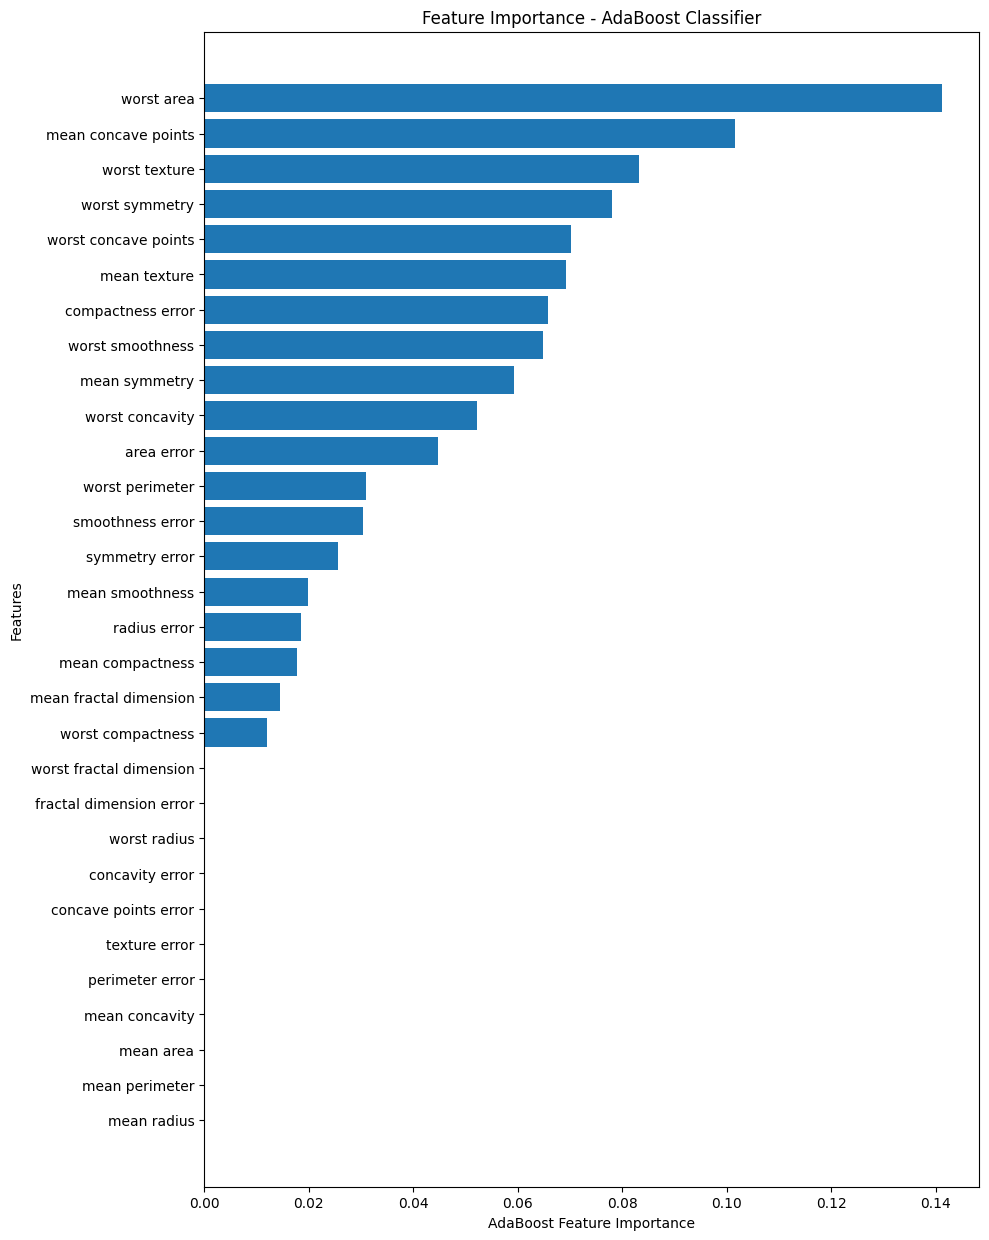


Feature Importances:
mean radius: 0.0
mean texture: 0.06926252102099634
mean perimeter: 0.0
mean area: 0.0
mean smoothness: 0.019926734256178726
mean compactness: 0.01782559626522545
mean concavity: 0.0
mean concave points: 0.10152852448102145
mean symmetry: 0.05922469584359393
mean fractal dimension: 0.014489860028780563
radius error: 0.01849121854804466
texture error: 0.0
perimeter error: 0.0
area error: 0.04465855738073485
smoothness error: 0.0304841032349306
compactness error: 0.0657993367161538
concavity error: 0.0
concave points error: 0.0
symmetry error: 0.025638390008539666
fractal dimension error: 0.0
worst radius: 0.0
worst texture: 0.08322843646683818
worst perimeter: 0.030982041900442365
worst area: 0.14120235489363062
worst smoothness: 0.06489290284758821
worst compactness: 0.012020914741919375
worst concavity: 0.052108525270613014
worst concave points: 0.0701823331246016
worst symmetry: 0.07805295297016648
worst fractal dimension: 0.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
# Replace 'base_estimator' with 'estimator'
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importance = clf.feature_importances_

# Visualize feature importances
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, len(feature_names) / 2)) #adjust figure to fit the amount of features

plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("AdaBoost Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - AdaBoost Classifier")
plt.show()

#Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

# 22.  Train a Gradient Boosting Regressor and plot learning curves.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 6 instead of 10.
  warnings.warn(


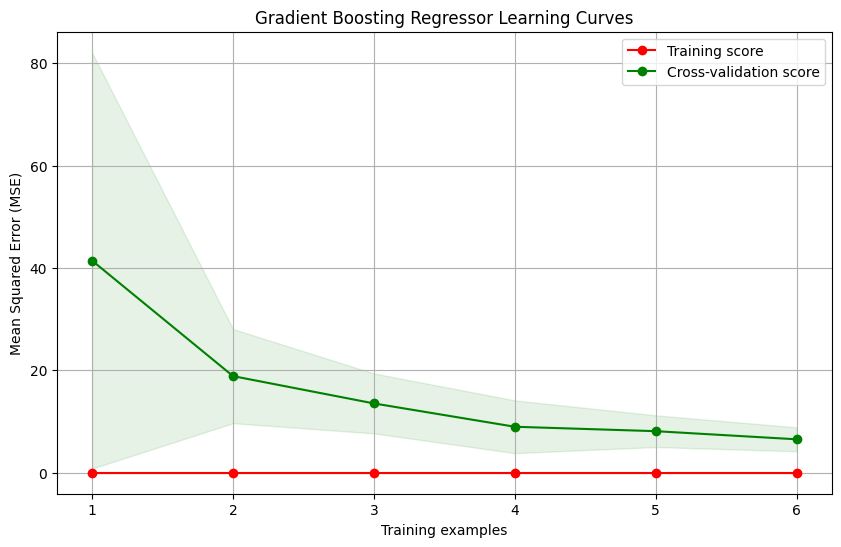


Test set MSE: 2.8446970087875374


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error

# Sample dataset (replace with your own data)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 5, 7, 9, 11.5, 13.2, 15.5, 17.8, 19.1, 21.3])  # Linear with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Gradient Boosting Regressor Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Train the regressor on the full training set and evaluate on test set for comparison.
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nTest set MSE: {mse}")

# 23. Train an XGBoost Classifier and visualize feature importance.

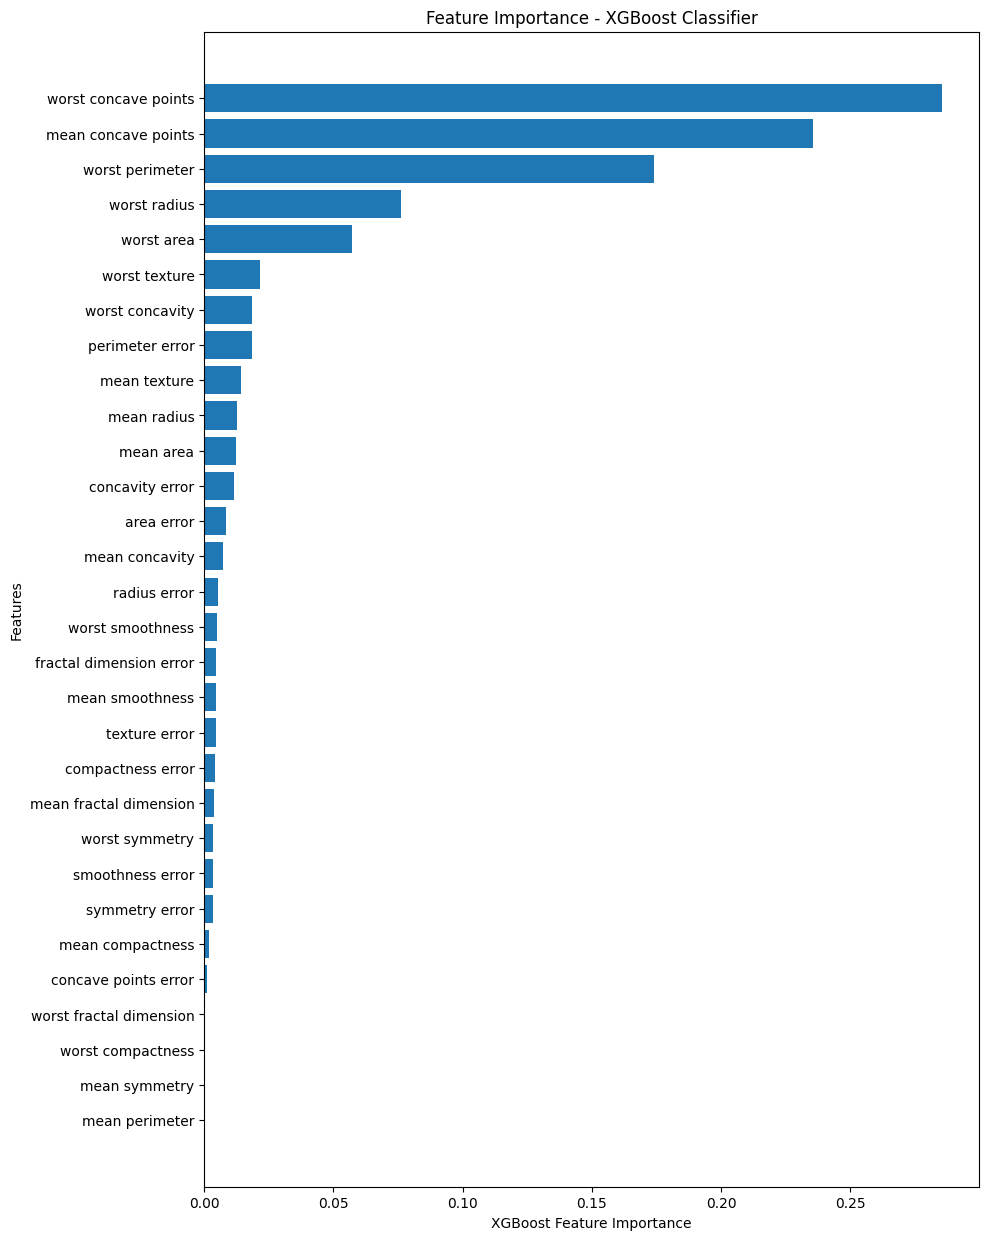


Feature Importances:
mean radius: 0.012818647548556328
mean texture: 0.014433246105909348
mean perimeter: 0.0
mean area: 0.012335632927715778
mean smoothness: 0.004638655576854944
mean compactness: 0.00201860792003572
mean concavity: 0.007316825445741415
mean concave points: 0.2357376664876938
mean symmetry: 0.0
mean fractal dimension: 0.003934955690056086
radius error: 0.005297525320202112
texture error: 0.004528097342699766
perimeter error: 0.018552502617239952
area error: 0.008527257479727268
smoothness error: 0.003319802228361368
compactness error: 0.004081066697835922
concavity error: 0.011444429866969585
concave points error: 0.0011458763619884849
symmetry error: 0.0033014093060046434
fractal dimension error: 0.0046635642647743225
worst radius: 0.07598652690649033
worst texture: 0.021675704047083855
worst perimeter: 0.17425283789634705
worst area: 0.057031355798244476
worst smoothness: 0.005140199325978756
worst compactness: 0.0
worst concavity: 0.018667180091142654
worst concav

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Get feature importances
feature_importance = xgb_clf.feature_importances_

# Visualize feature importances
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, len(feature_names) / 2)) #adjust figure size to fit number of features
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost Classifier")
plt.show()

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

# 24. Train a CatBoost Classifier and plot the confusion matrix.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
class_names = cancer.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Classifier
catboost_clf = CatBoostClassifier(iterations=100,
                                 learning_rate=0.1,
                                 depth=3,
                                 loss_function='Logloss',
                                 verbose=0,
                                 random_state=42)

# Train the classifier
catboost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()

# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

n_estimators=10, Accuracy: 0.9649122807017544
n_estimators=20, Accuracy: 0.9736842105263158
n_estimators=50, Accuracy: 0.9649122807017544
n_estimators=100, Accuracy: 0.9736842105263158
n_estimators=200, Accuracy: 0.9736842105263158
n_estimators=300, Accuracy: 0.9736842105263158
n_estimators=400, Accuracy: 0.9736842105263158
n_estimators=500, Accuracy: 0.9736842105263158


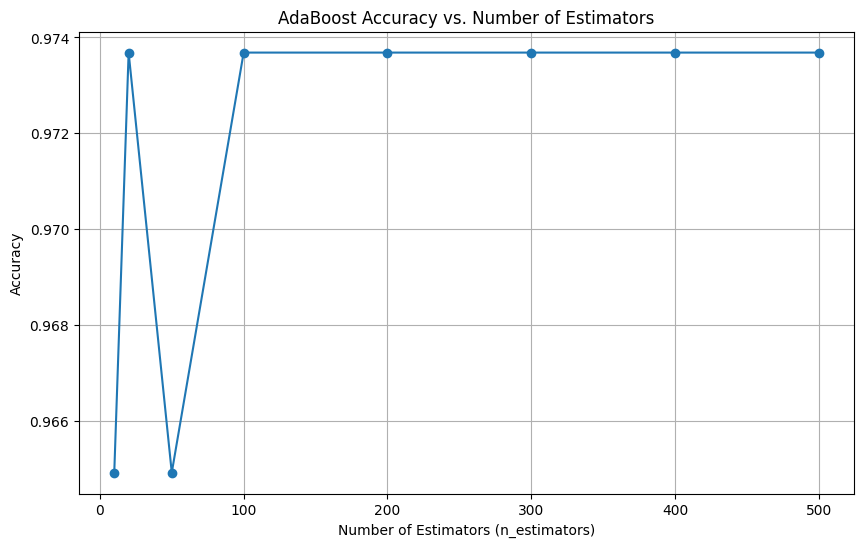


Best n_estimators: 20, Best Accuracy: 0.9736842105263158


In [23]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of estimators to try
n_estimators_range = [10, 20, 50, 100, 200, 300, 400, 500]
accuracies = []

# Train and evaluate AdaBoost classifiers with different numbers of estimators
for n_estimators in n_estimators_range:
    # Replace 'base_estimator' with 'estimator'
    clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"n_estimators={n_estimators}, Accuracy: {accuracy}")

# Plot the accuracy vs. number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs. Number of Estimators")
plt.grid(True)
plt.show()

#Find the best number of estimators
best_n_estimators = n_estimators_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest n_estimators: {best_n_estimators}, Best Accuracy: {best_accuracy}")

# 26. Train a Gradient Boosting Classifier and visualize the ROC curve.

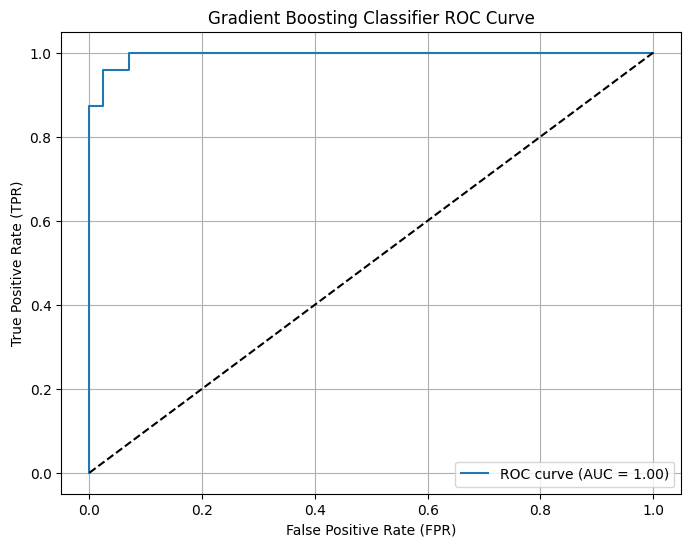

AUC: 0.9950867998689813


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f"AUC: {roc_auc}")

# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [25]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Sample dataset (replace with your own data)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 5, 7, 9, 11.5, 13.2, 15.5, 17.8, 19.1, 21.3])  # Linear with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300], # adding n_estimators for more robust tuning.
    'max_depth': [3,4,5] # adding max_depth for more robust tuning.
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (Negative MSE): {best_score}")

# Train the regressor with the best parameters
best_xgbr = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgbr.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Test set MSE with best parameters: {mse}")

# Example to show predicted vs actual values
print("\nPredicted vs. Actual (with best parameters):")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 100}
Best Score (Negative MSE): -7.726554586008509
Test set MSE with best parameters: 2.8428983399838055

Predicted vs. Actual (with best parameters):
Predicted: 17.80, Actual: 19.1
Predicted: 3.00, Actual: 5.0


# 28.  Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, weights=[0.9, 0.1], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Classifier without class weights
catboost_clf_no_weights = CatBoostClassifier(iterations=100,
                                            learning_rate=0.1,
                                            depth=3,
                                            loss_function='Logloss',
                                            verbose=0,
                                            random_state=42)
catboost_clf_no_weights.fit(X_train, y_train)
y_pred_no_weights = catboost_clf_no_weights.predict(X_test)

print("CatBoost without class weights:")
print(classification_report(y_test, y_pred_no_weights))
cm_no_weights = confusion_matrix(y_test, y_pred_no_weights)
plt.figure()
sns.heatmap(cm_no_weights, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (No Weights)")
plt.show()

# CatBoost Classifier with class weights
class_weights = {0: 1, 1: 9}  # Adjust weights based on class imbalance
catboost_clf_weights = CatBoostClassifier(iterations=100,
                                          learning_rate=0.1,
                                          depth=3,
                                          loss_function='Logloss',
                                          verbose=0,
                                          class_weights=class_weights,
                                          random_state=42)
catboost_clf_weights.fit(X_train, y_train)
y_pred_weights = catboost_clf_weights.predict(X_test)

print("\nCatBoost with class weights:")
print(classification_report(y_test, y_pred_weights))
cm_weights = confusion_matrix(y_test, y_pred_weights)
plt.figure()
sns.heatmap(cm_weights, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (With Weights)")
plt.show()

#Compare the number of predicted 1's
print("\nComparison of number of predicted 1's:")
print(f"Without weights: {np.sum(y_pred_no_weights)}")
print(f"With weights: {np.sum(y_pred_weights)}")

# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

Learning Rate: 0.01, Accuracy: 0.9385964912280702
Learning Rate: 0.1, Accuracy: 0.956140350877193
Learning Rate: 0.5, Accuracy: 0.9649122807017544
Learning Rate: 1.0, Accuracy: 0.9649122807017544
Learning Rate: 2.0, Accuracy: 0.7719298245614035


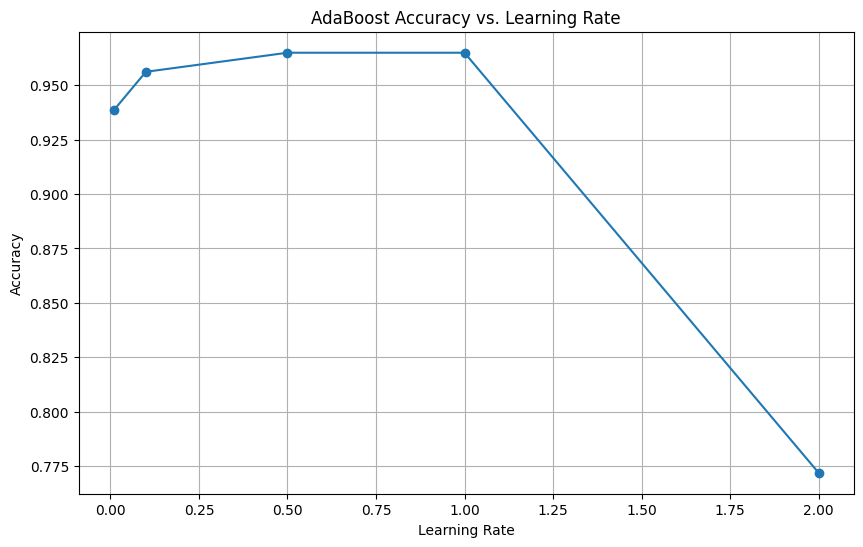


Best Learning Rate: 0.5, Best Accuracy: 0.9649122807017544


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of learning rates to try
learning_rates = [0.01, 0.1, 0.5, 1.0, 2.0]
accuracies = []

# Train and evaluate AdaBoost classifiers with different learning rates
# Replace 'base_estimator' with 'estimator'
for learning_rate in learning_rates:
    clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=learning_rate, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Learning Rate: {learning_rate}, Accuracy: {accuracy}")

# Plot the accuracy vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs. Learning Rate")
plt.grid(True)
plt.show()

#Find the best learning rate
best_learning_rate = learning_rates[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest Learning Rate: {best_learning_rate}, Best Accuracy: {best_accuracy}")

# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [29]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load the Iris dataset (multi-class)
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier for multi-class classification
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', random_state=42) #softprob returns probabilities.

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = xgb_clf.predict_proba(X_test)

# Calculate log-loss
logloss = log_loss(y_test, y_pred_proba)

# Print log-loss
print(f"Log-loss: {logloss}")

#Example of predictions
y_pred = xgb_clf.predict(X_test)
print("\nPredictions vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {class_names[y_pred[i]]}, Actual: {class_names[y_test[i]]}")

Log-loss: 0.009289027880442384

Predictions vs Actual:
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: virg